# Bernoulli Distribution

- n = states also = trials make sense
- this answers the sum, given n=100 people, what the probability of getting 90 people covid? NOTE THIS IS NOT ASKING IF THE PROB OF 1 PERSON GETTING COVID IS 0.2!!!

## Definition

```{prf:definition} Bernoulli Distribution
:label: def:bernoulli

Let $X$ be a **Bernoulli random variable** with parameter $p$. Then the 
probability mass function (PMF) of $X$ is given by 

$$
\begin{align}
\P(X=x) = \begin{cases}
p   &\quad \text{ if } x=1 \\
1-p &\quad \text{ if } x=0 \\
0   &\quad \text{ otherwise }
\end{cases}
\end{align}
$$

where $0 \leq p \leq 1$ is called the Bernoulli parameter. 

Some conventions:

1. We denote $X \sim \bern(p)$ if $X$ follows a Bernoulli distribution with parameter $p$.
2. The states of $X$ are $x \in \{0,1\}$. This means $X$ only has two (binary) states, 0 and 1.
3. We denote $1$ as **success** and $0$ as **failure** and consequently $p$ as the probability of success
and $1-p$ as the probability of failure.
4. Bear in mind that $X$ is defined over $\pspace$, and when we say $\P \lsq X=x \rsq$, we are also saying
$\P \lsq E \rsq$ where $E \in \E$. Imagine a coin toss, $E$ is the event that the coin lands on heads,
which translates to $E = \{X=1\}$.
5. Note further that a Bernoulli Trial is a **single** experiment with only two possible outcomes.
This will be the main difference when we learn Binomial distribution (i.e. sampling 1 guy vs sampling n guys).
```

## Expectation and Variance

```{prf:property} Expectation of Bernoulli Distribution
:label: prop:bernoulli

Let $X \sim \bern(p)$ be a Bernoulli random variable with parameter $p$. Then the expectation of $X$ is given by

$$
\begin{align}
\exp \lsq X \rsq = \sum_{x \in X(\S)} x \cdot \P(X=x) = 1 \cdot p + 0 \cdot (1-p) = p
\end{align}
$$
```

```{prf:property} Variance of Bernoulli Distribution
:label: prop:bernoulli_var

Let $X \sim \bern(p)$ be a Bernoulli random variable with parameter $p$. Then the variance of $X$ is given by

$$
\begin{align}
\var \lsq X \rsq = \sum_{x \in X(\S)} (x - \exp \lsq X \rsq)^2 \cdot \P(X=x) = (1 - p)^2 \cdot p + (0 - p)^2 \cdot (1-p) = p(1-p)
\end{align}
$$

It can also be shown using the second moment of $X$:

$$
\begin{align}
\var \lsq X \rsq = \exp \lsq X^2 \rsq - \exp \lsq X \rsq^2 = \exp \lsq X^2 \rsq - p^2 = p(1-p)
\end{align}
$$
```

## Maximum Variance 

### Minimum and Maximum Variance of Coin Toss

This example is taken from {cite}`chan_2021`, page 140.

Consider a coin toss, following a Bernoulli distribution. Define $X \sim \bern(p)$.

If we toss the coin $n$ times, then we ask ourselves what is the minimum and maximum variance of the coin toss.

Recall in {prf:ref}`def_variance` that the variance is basically how much the data deviates from the mean.

If the coin is biased at $p=1$, then the variance is $0$ because the coin always lands on heads. The 
intuition is that the coin is "deterministic", and hence there is no variance at all. If the coin
is biased at $p=0.9$, then there is a little variance, because the coin will consistently land on heads
$90\%$ of the time. If the coin is biased at $p=0.5$, then there is a lot of variance, because the coin
is fair and has a 50-50 chance of landing on heads or tails. Though fair, the variance is maximum here.

## Python Examples

In [1]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parent)
sys.path.append(parent_dir)

import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

from utils import seed_all, true_pmf, empirical_pmf

In [2]:
seed_all(42)

Using Seed Number 42


We will use the same setup in {doc}`0307_discrete_uniform_distribution`.

Let the true population be defined as a total of $1000$ people. We talked about the height previously,
and found out that the height of a person follows a uniform distribution.

Now, we cannot model the height as a Bernoulli distribution because if we use the same random variable
$X$ being the height of a **randomly** selected person from the **true population**, the
Bernoulli distribution cannot be constructed because it takes on a binary value by definition!

Our sample space for the height is of $\{1, 2, \ldots, 10\}$, and the corresponding state space
$X(\S)$ is the same, consisting of 10 values. Bernoulli only allows $X$ to take on two values/states,
thus in our case, this condition has failed. However, if you ask a different question in terms
of binary: ***What is the probability of the randomly selected person of taller than 5cm?*** Then 
this is a valid problem that can be modelled after the Bernoulli distribution, as we satisfy both 
conditions, one being that the state space has only 2 values (2 outcomes in sample space), the 
other being it is a single trial/experiment.

We will now use a more interesting setup, disease modelling. 

Let the experiment be a triplet $\pspace$, this experiment is the action of ***randomly selecting***
a person from the true population.

Let us define $Y$ to be the ***covid-status*** of a ***randomly selected person*** from the true population.

Amongst the 1000 people, any person can only have 1 single status/outcome, either he/she has covid, or don't.
Thus, this can be treated as a **Bernoulli** distribution. 

Since our problem is about the covid status of the person, we define our **sample space**
to be $\Omega = \{0, 1\}$, where $0$ means no-covid and $1$ means has-covid. And since we know the
true population, we proceed to find out ***that there are 200 people with covid, and 800 without!***

Now suppose I want to answer a few simple questions about the experiment. For example, I want to know

1. What is the probability of selecting a person with covid?
2. What is the expected value of the true population?

Since we have defined $Y$ earlier, the corresponding state space $Y(\S)$ is also $\{0, 1\}$.
We can associate each state
$y \in Y(\S)$ with a probability $P(Y = y)$. This is the ***probability mass function*** (PMF) of $Y$.

$$
\begin{align}
\P(Y=y) = \begin{cases}
p   &\quad \text{ if } y=1 \\
1-p &\quad \text{ if } y=0 \\
0   &\quad \text{ otherwise }
\end{cases}
\end{align}
$$

and we seek to find $p$, and since we already know the true population ($p=0.2$),
we can plot an ideal histogram to see the distribution of how the covid-status of each person in the true population is distributed.
An important reminder is that in real world, we often won't know the true population, and therefore ***estimating/inferencing*** the
$p$ parameter becomes important. 

In [6]:
# create a true population of 1000 people of 200 1s and 800 0s
true_population = np.zeros(shape=1000)
true_population[:200] = 1

In [7]:
def plot_true_pmf(population: np.ndarray):
    """Plots the PMF of the true population."""
    bins = np.arange(0, population.max() + 1.5) - 0.5
    fig, ax = plt.subplots()
    _ = ax.hist(
        population,
        bins,
        density=True,
        color="#0504AA",
        alpha=0.5,
        edgecolor="black",
        linewidth=2,
    )
    _ = ax.stem(
        population,
        [true_pmf(x, population) for x in population],
        linefmt="C3-",
        markerfmt="C3o",
        basefmt="C3-",
        use_line_collection=True,
    )

    _ = ax.set_xlabel("Covid Status")
    _ = ax.set_ylabel("Probability")
    _ = ax.set_title("PMF of the true population")
    _ = ax.set_xticks(bins + 0.5)
    #ax.set_xticklabels(["Negative", "Positive"])

    return fig, ax

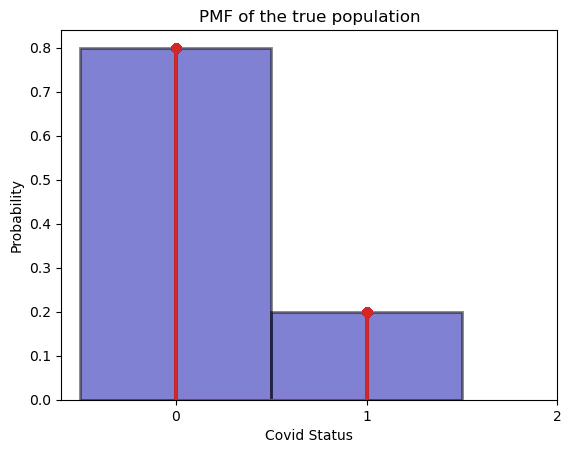

In [8]:
_ = plot_true_pmf(true_population)

The true pmf (ideal histogram) gives the answer that out of the true population, $80\%$ has no covid, and $20\%$ has covid.

So our PMF is realized:

$$
\begin{align}
\P(Y=y) = \begin{cases}
0.2  &\quad \text{ if } y=1 \\
0.8 &\quad \text{ if } y=0 \\
0   &\quad \text{ otherwise }
\end{cases}
\end{align}
$$

We can then draw samples of 100, 500 and 900 to get the relative frequencies, and see if it indeed converges to $p=0.2$.

In [24]:
sample_100 = np.random.choice(true_population, 100, replace=True)
sample_500 = np.random.choice(true_population, 500, replace=True)
sample_900 = np.random.choice(true_population, 900, replace=True)

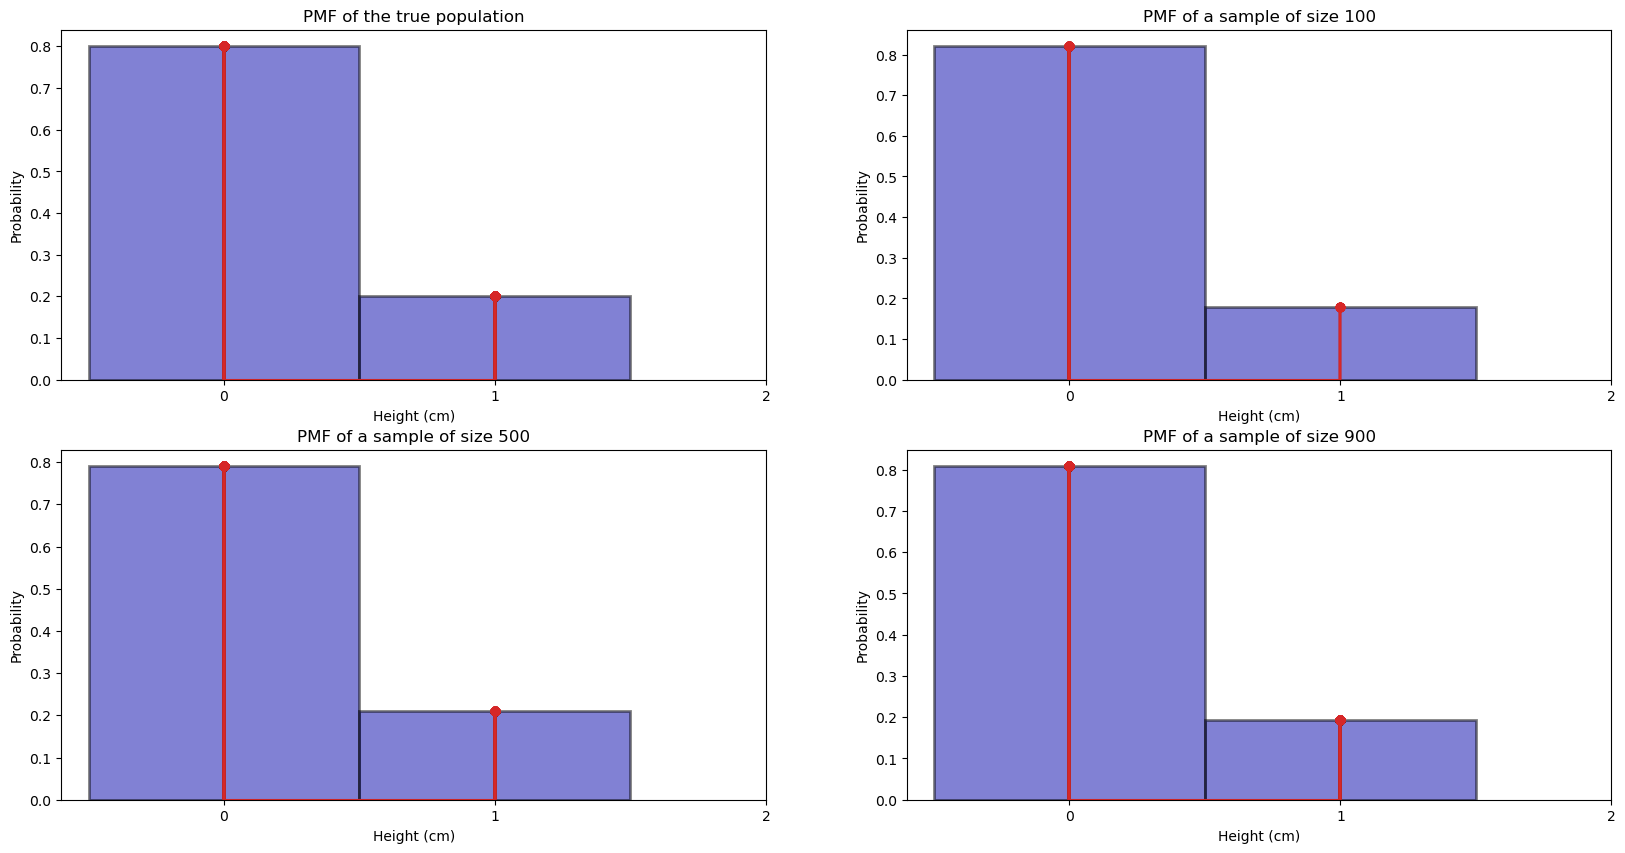

In [25]:
# ideal + empirical
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
bins = np.arange(0, true_population.max() + 1.5) - 0.5
axs[0, 0].hist(
    true_population,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[0, 0].stem(
    true_population,
    [true_pmf(x, true_population) for x in true_population],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[0, 0].set_title("PMF of the true population")
axs[0, 0].set_xlabel("Height (cm)")
axs[0, 0].set_ylabel("Probability")
axs[0, 0].set_xticks(bins + 0.5)

axs[0, 1].hist(
    sample_100,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[0, 1].stem(
    sample_100,
    [empirical_pmf(x, sample_100) for x in sample_100],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[0, 1].set_title("PMF of a sample of size 100")
axs[0, 1].set_xlabel("Height (cm)")
axs[0, 1].set_ylabel("Probability")
axs[0, 1].set_xticks(bins + 0.5)

axs[1, 0].hist(
    sample_500,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[1, 0].stem(
    sample_500,
    [empirical_pmf(x, sample_500) for x in sample_500],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[1, 0].set_title("PMF of a sample of size 500")
axs[1, 0].set_xlabel("Height (cm)")
axs[1, 0].set_ylabel("Probability")
axs[1, 0].set_xticks(bins + 0.5)

axs[1, 1].hist(
    sample_900,
    bins,
    density=True,
    color="#0504AA",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)
axs[1, 1].stem(
    sample_900,
    [empirical_pmf(x, sample_900) for x in sample_900],
    linefmt="C3-",
    markerfmt="C3o",
    basefmt="C3-",
    use_line_collection=True,
)
axs[1, 1].set_title("PMF of a sample of size 900")
axs[1, 1].set_xlabel("Height (cm)")
axs[1, 1].set_ylabel("Probability")
axs[1, 1].set_xticks(bins + 0.5);

Following code cited from {cite}`foundations_of_data_science_with_python_2021` for my experimentation!

In [ ]:
# ?stats.bernoulli

In [26]:
Y = stats.bernoulli(0.2) # `Y` is now an object that represents a Bernoulli random variable with parameter $p=0.2$.
# help(Y)

Let's inspect and then plot the PMF values:

In [41]:
b = np.arange(-1, 3)
Y.pmf(b)

array([0. , 0.8, 0.2, 0. ])

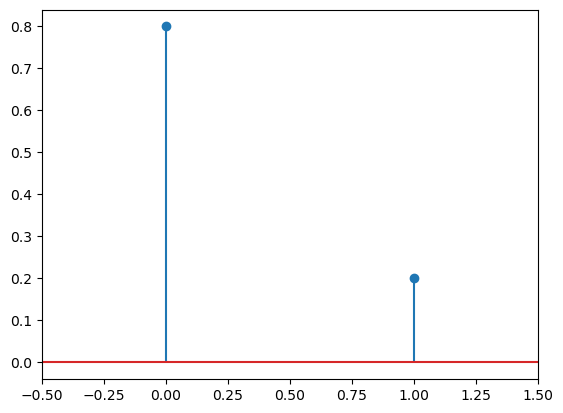

In [42]:
plt.stem(b, Y.pmf(b), use_line_collection=True)
plt.xlim(-0.5, 1.5);

The CDF also works as expected:

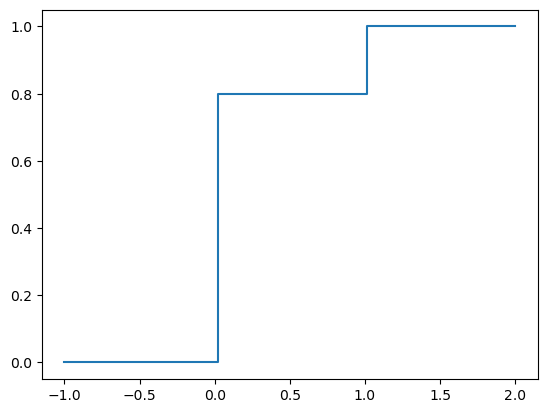

In [43]:
y = np.linspace(-1, 2, 101)
plt.step(y, Y.cdf(y), where="post");

Each `scipy.stats` random variables also has the ability to draw random values from the specified distribution (i.e., to get values of the random variable).  The method to do this is called `rvs`. If it is called with no argument, then it generates a single value of that random variable:

In [44]:
Y.rvs()

0

More commonly, we pass the number of random values we want to generate as an argument:

In [45]:
Y.rvs(10)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

Lets simulate 100_000 values of the Bernoulli(0.2) random variable and plot a histogram of the values. We will also capture the output counts to compare the relative frequencies with the true values:

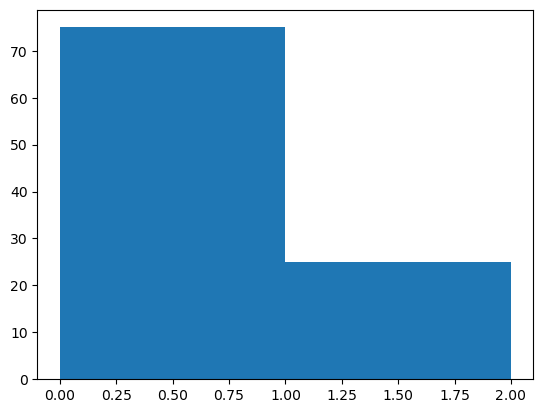

In [46]:
num_sims = 100
y = Y.rvs(num_sims)
mybins = [0, 1, 2]
counts, mybins, patches = plt.hist(y, bins=mybins)

Then the relative frequencies are:

The relative freqs are [0.75 0.25]


<StemContainer object of 3 artists>

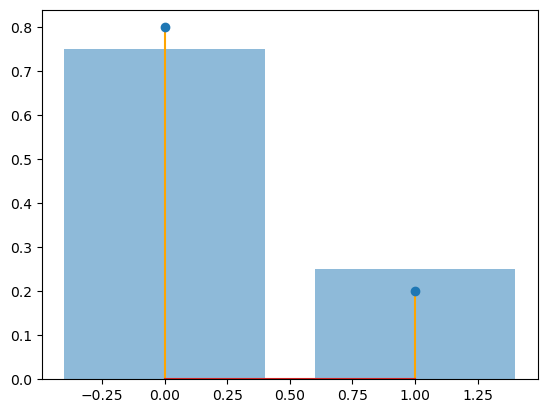

In [47]:
print(f"The relative freqs are {counts/num_sims}")
plt.bar([0, 1], counts / num_sims, alpha=0.5)

plt.stem([0, 1], Y.pmf([0, 1]), linefmt="orange", use_line_collection=True)

Closer with 10000.

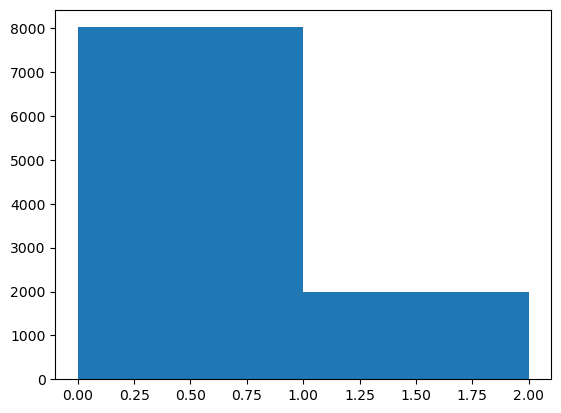

In [48]:
num_sims = 10000
y = Y.rvs(num_sims)
mybins = [0, 1, 2]
counts, mybins, patches = plt.hist(y, bins=mybins)

The relative freqs are [0.8022 0.1978]


<StemContainer object of 3 artists>

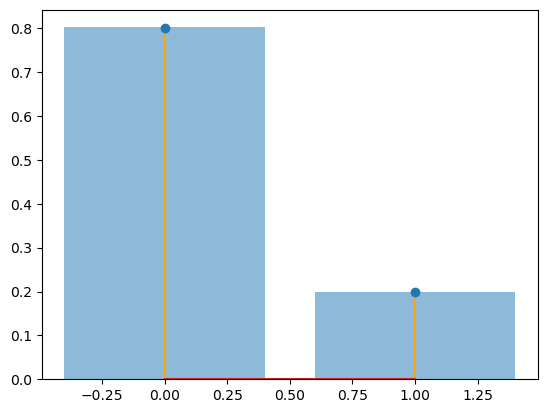

In [49]:
print(f"The relative freqs are {counts/num_sims}")
plt.bar([0, 1], counts / num_sims, alpha=0.5)

plt.stem([0, 1], Y.pmf([0, 1]), linefmt="orange", use_line_collection=True)

## Further Readings

- https://jmshea.github.io/Foundations-of-Data-Science-with-Python/08-random-variables/important-discrete-rvs.html#bernoulli-random-variable
- https://www.probabilitycourse.com/chapter3/3_1_5_special_discrete_distr.php
- https://bcheggeseth.github.io/Stat155Notes/bernoullibinomial-model.html

## Citations

```{bibliography}
:style: unsrt
:filter: docname in docnames
```